<a href="https://colab.research.google.com/github/brunocosouza/deep_learning/blob/main/keras_first_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from   tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Scaling the images
X_train = np.load("X_train.npy") / 255
X_train_gray = np.mean(X_train, axis = -1)
Y_train = np.load("Y_train.npy")

# Shape
X_train_gray.shape, Y_train.shape

((213, 200, 200), (213,))

In [ ]:
# Scaling valid dataset
X_valid = np.load("X_valid.npy") / 255
X_valid_gray = np.mean(X_valid, axis = -1)
Y_valid = np.load("Y_valid.npy")

#Shape
X_valid_gray.shape, Y_valid.shape

((71, 200, 200), (71,))

In [ ]:
# Scaling test dataset
X_test = np.load("X_test.npy") / 255
X_test_gray = np.mean(X_test, axis = -1)
Y_test = np.load("Y_valid.npy")

#Shape
X_test_gray.shape, Y_test.shape

((71, 200, 200), (71,))

In [ ]:
import tensorflow as tf
from   tensorflow import keras

# inherit Model from keras: the Subclass type
class MyModel(keras.models.Model):
    def __init__(self, shape=[200,200], activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.input1  = keras.layers.Input(shape, name="input")
        self.flatten = keras.layers.Flatten(input_shape=[200,200],  name="flatten")
        self.hidden1 = keras.layers.Dense(400, activation="relu", name="hidden1", kernel_initializer="he_uniform")
        self.hidden2 = keras.layers.Dense(100, activation="relu", name="hidden2", kernel_initializer="he_uniform")
        self.output1 = keras.layers.Dense(10, activation="softmax", name="decision")
        
    def call(self, inputs):
        input1  = inputs # in case you had multiple inputs, you could separate them from a list
        flatten = self.flatten(input1)
        hidden1 = self.hidden1(flatten)
        hidden2 = self.hidden2(hidden1)
        concat  = keras.layers.concatenate([hidden1, hidden2])
        output1 = self.output1(concat)
        return output1 # in case you had multiple outputs, you could return them in a list

keras.backend.clear_session() # clean memory from previous models 
np.random.seed(42)            
tf.random.set_seed(42)
model = MyModel()

In [ ]:
# Pick an optimizer

opt =  keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=True)
# opt =  keras.optimizers.RMSProp(learning_rate=1e-3, rho=0.9)
# opt =  keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999)

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=opt, 
              metrics=["accuracy"])

# Define a learning rate schedule as a callback function

def exponential_decay(epoch):
    return(0.01*0.1**(epoch/20))

num_epochs   = 20
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay)

In [ ]:
history  = model.fit(X_train_gray, Y_train, epochs=num_epochs, validation_data=(X_valid_gray, Y_valid))

Epoch 1/20
7/7 [==============================] - 1s 122ms/step - loss: 1.9248 - accuracy: 0.3568 - val_loss: 1.4897 - val_accuracy: 0.5493
Epoch 2/20
7/7 [==============================] - 1s 99ms/step - loss: 1.1969 - accuracy: 0.6197 - val_loss: 1.2076 - val_accuracy: 0.5775
Epoch 3/20
7/7 [==============================] - 1s 96ms/step - loss: 0.8483 - accuracy: 0.7559 - val_loss: 1.0510 - val_accuracy: 0.6479
Epoch 4/20
7/7 [==============================] - 1s 94ms/step - loss: 0.6455 - accuracy: 0.8357 - val_loss: 0.9371 - val_accuracy: 0.6620
Epoch 5/20
7/7 [==============================] - 1s 96ms/step - loss: 0.5016 - accuracy: 0.8920 - val_loss: 0.8838 - val_accuracy: 0.6761
Epoch 6/20
7/7 [==============================] - 1s 92ms/step - loss: 0.4029 - accuracy: 0.9343 - val_loss: 0.8394 - val_accuracy: 0.6761
Epoch 7/20
7/7 [==============================] - 1s 93ms/step - loss: 0.3292 - accuracy: 0.9577 - val_loss: 0.8027 - val_accuracy: 0.7324
Epoch 8/20
7/7 [==========

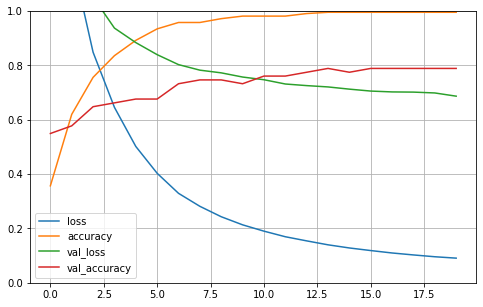

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.save("my_keras_model.tf")

INFO:tensorflow:Assets written to: my_keras_model.tf/assets
